### K-Means: Studi Kasus Segmentasi Pelanggan Mall

In [ ]:
from google.colab import drive
import sys
import os
drive.mount('/content/gdrive')
drivePath = ('/content/gdrive/My Drive/DataViskom')
sys.path.append(drivePath)
os.chdir(drivePath)
current_dir = os.getcwd()
current_dir

Mounted at /content/gdrive


'/content/gdrive/My Drive/DataViskom'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('mall_customer.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### I. Data Preprocessing

In [ ]:
# Missing values
print("missing value:")
print(df.isna().sum())

# Cek Duplikasi Data
print("jumlah duplikasi ", df.duplicated().sum())

missing value:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
jumlah duplikasi  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


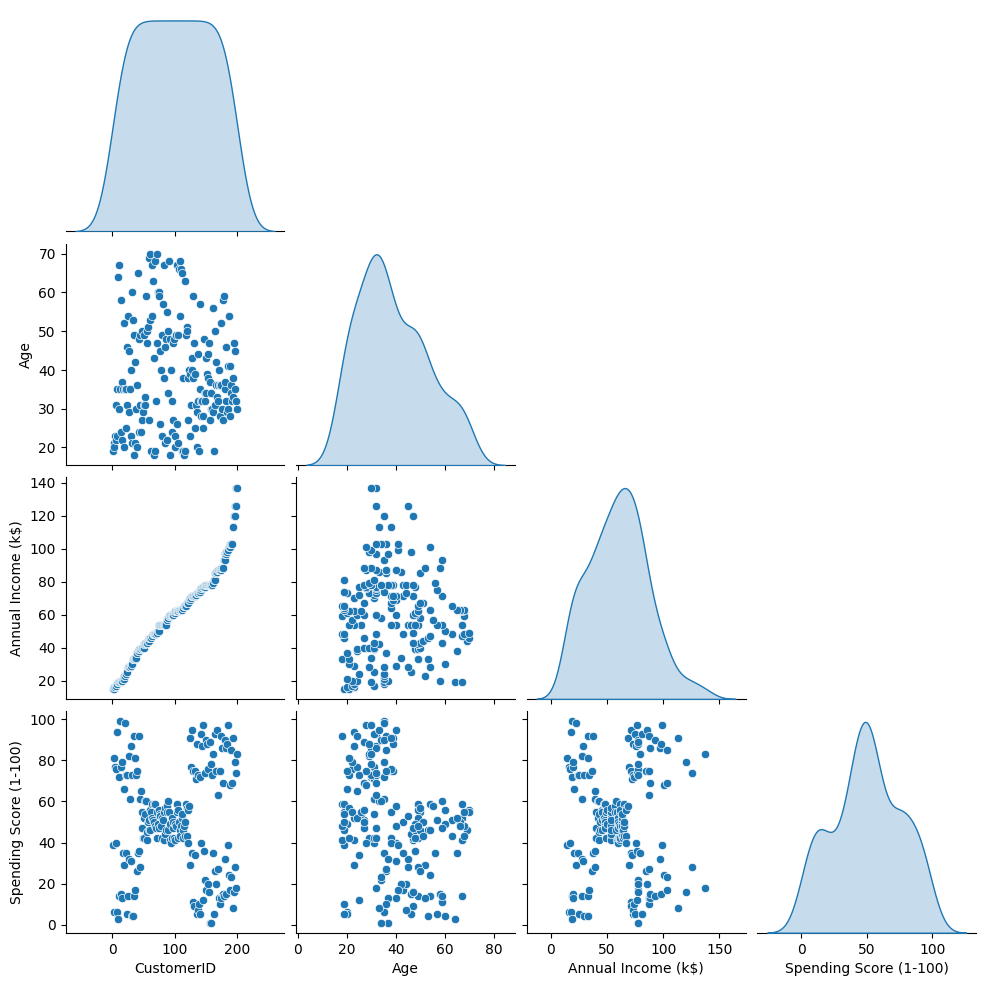

In [ ]:
sns.pairplot (df, corner=True, diag_kind="kde")
plt.show()

In [ ]:
# menghapus feature CustomerID
df.drop('CustomerID', axis=1, inplace=True)

# rename kolom
df.rename(columns={'Annual Income (k$)': 'Annual Income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'Spending Score'}, inplace=True)

# merubah nilai male dan female menjadi numerik
from sklearn.preprocessing import StandardScaler, LabelEncoder

labeler = LabelEncoder()
df['Gender'] = labeler.fit_transform(df['Gender'])

df

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


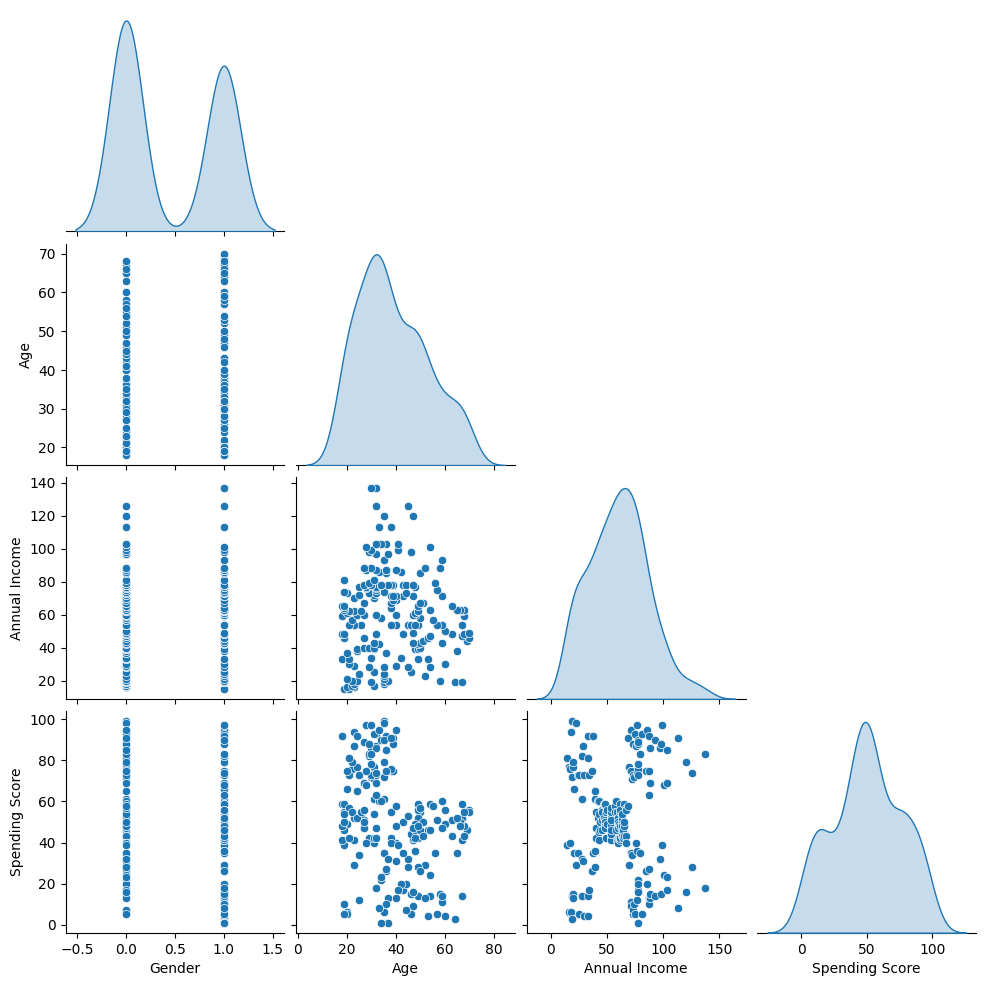

In [ ]:
sns.pairplot (df, corner=True, diag_kind="kde")
plt.show()

In [ ]:
df.describe()

,Gender,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [ ]:
#Scaling Data
scaler = StandardScaler()

# scaling kecuali gender
Gender = df['Gender']
df.drop('Gender', axis = 1)

#proses scaling
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df['Gender'] = Gender
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


#### II. Training Model

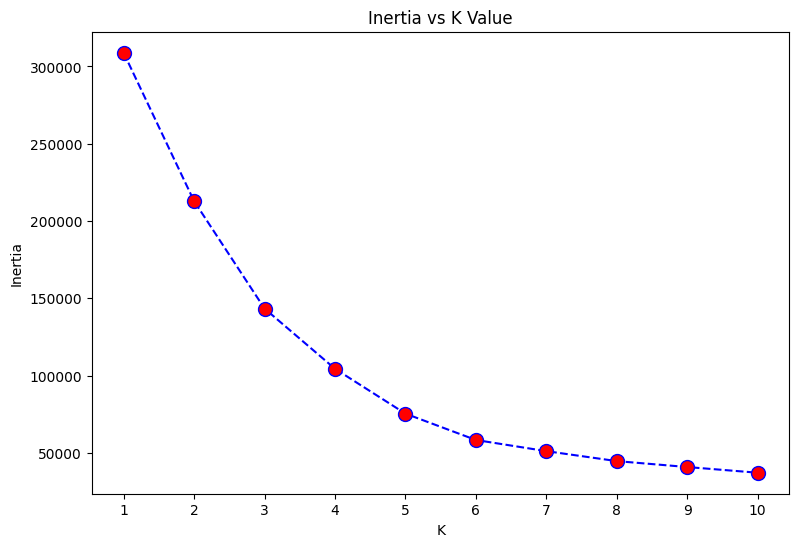

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Tambahkan random_state untuk hasil yang konsisten
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), inertia_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertia vs K Value')
plt.xticks(range(1, 11, 1))
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show() # Tambahkan plt.show() untuk menampilkan plot

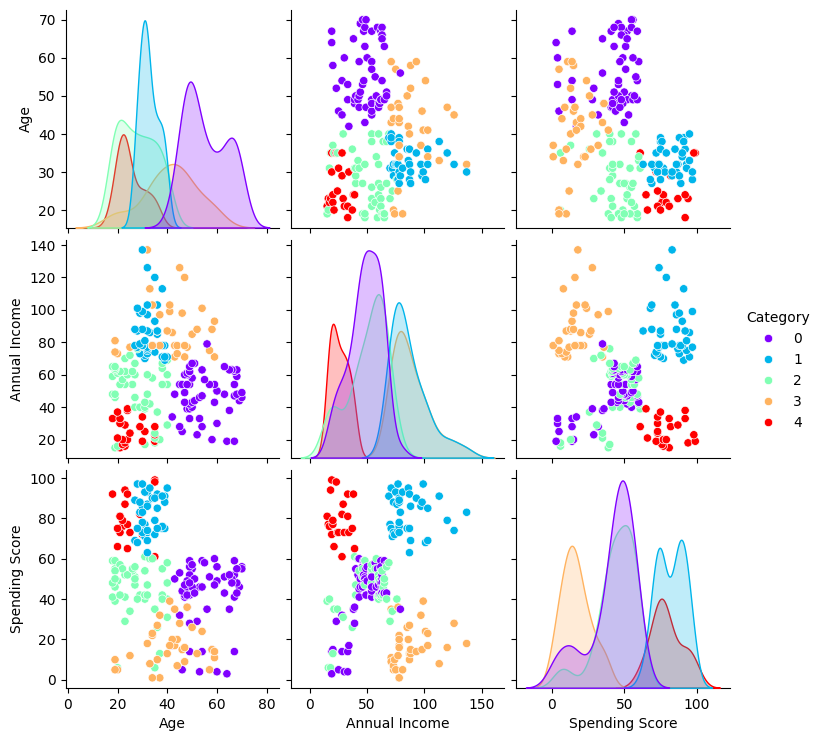

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

km = KMeans(n_clusters=5, random_state=42).fit(df)  # Tambahkan random_state

# Membaca kembali original data ke variabel lain
# karena data untuk clustering telah diubah-ubah
df_ori = pd.read_csv('mall_customer.csv')
df_ori.drop('CustomerID', axis=1, inplace=True)  # Perbaikan nama kolom
df_ori.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True) # Perbaikan syntax rename

# Membuat satu kolom category untuk menampung hasil kluster kita
df_ori['Category'] = km.labels_

sns.pairplot(data=df_ori, hue='Category', palette='rainbow')
plt.show() # Tambahkan plt.show() untuk menampilkan plot

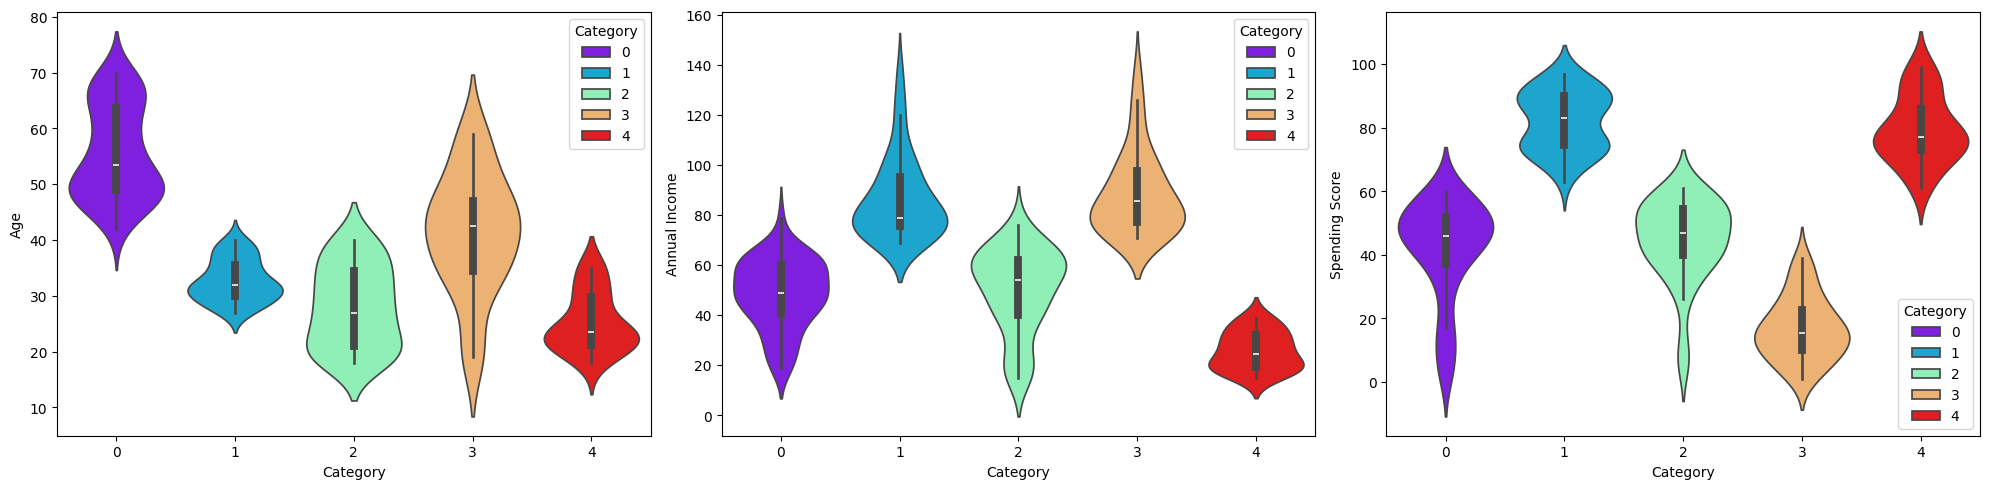

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.violinplot(x='Category', y='Age', hue='Category', palette='rainbow', data=df_ori, ax=axes[0])
sns.violinplot(x='Category', y='Annual Income', hue='Category', palette='rainbow', data=df_ori, ax=axes[1])
sns.violinplot(x='Category', y='Spending Score', hue='Category', palette='rainbow', data=df_ori, ax=axes[2])

plt.tight_layout() # Untuk mencegah label tumpang tindih (opsional)
plt.show()

In [ ]:
df_ori[['Age', 'Annual Income', 'Spending Score', 'Category']].groupby('Category').mean()

,Age,Annual Income,Spending Score
Category,,,
0,55.551724,48.482759,41.775862
1,32.692308,86.538462,82.128205
2,27.957447,50.000000,44.638298
3,41.264706,88.500000,16.764706
4,25.272727,25.727273,79.363636


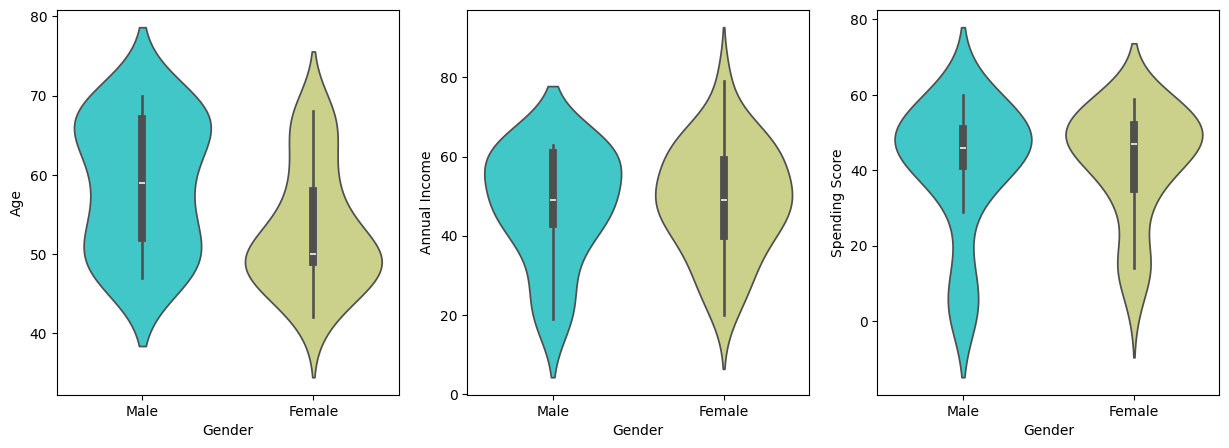

In [ ]:
group_1 = df_ori[df_ori['Category']==0]
group_1.head()

fig, axes = plt.subplots (1,3, figsize=(15,5))


sns.violinplot(x = 'Gender', y = 'Age', data = group_1, hue='Gender', palette='rainbow', ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income', data = group_1, hue='Gender', palette='rainbow', ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score', data = group_1, hue='Gender', palette='rainbow', ax=axes[2])

plt.show()

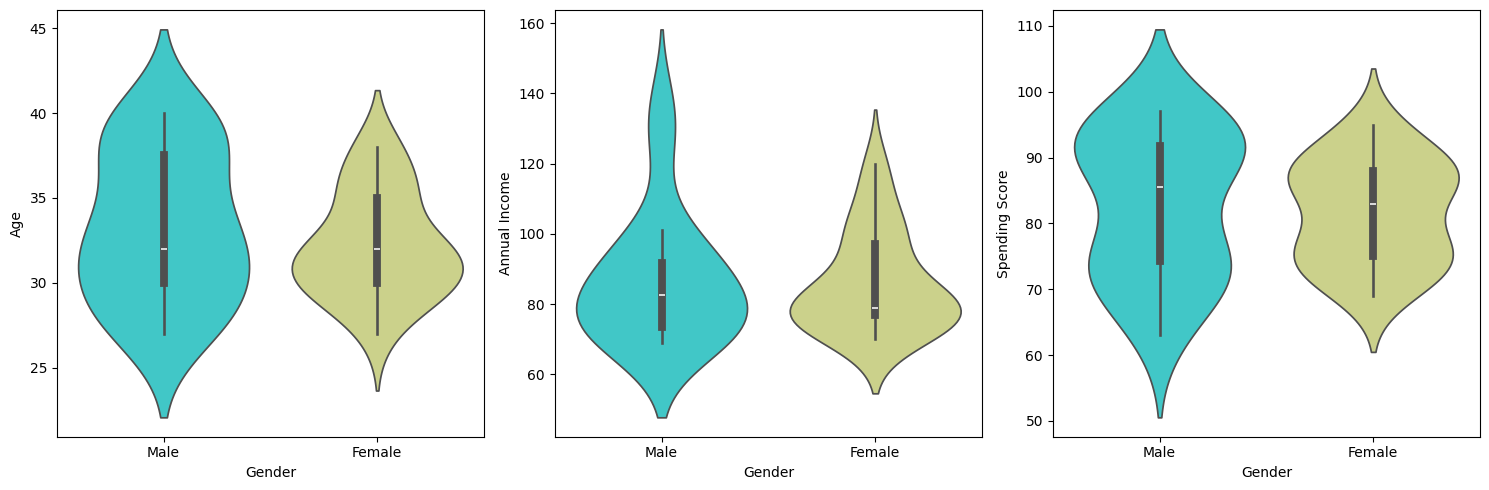

In [ ]:
group_2 = df_ori[df_ori['Category'] == 1]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(x='Gender', y='Age', data=group_2, hue='Gender', palette='rainbow', ax=axes[0])
sns.violinplot(x='Gender', y='Annual Income', data=group_2, hue='Gender', palette='rainbow', ax=axes[1])
sns.violinplot(x='Gender', y='Spending Score', data=group_2, hue='Gender', palette='rainbow', ax=axes[2])

plt.tight_layout() # Opsional: Untuk mencegah tumpang tindih
plt.show()

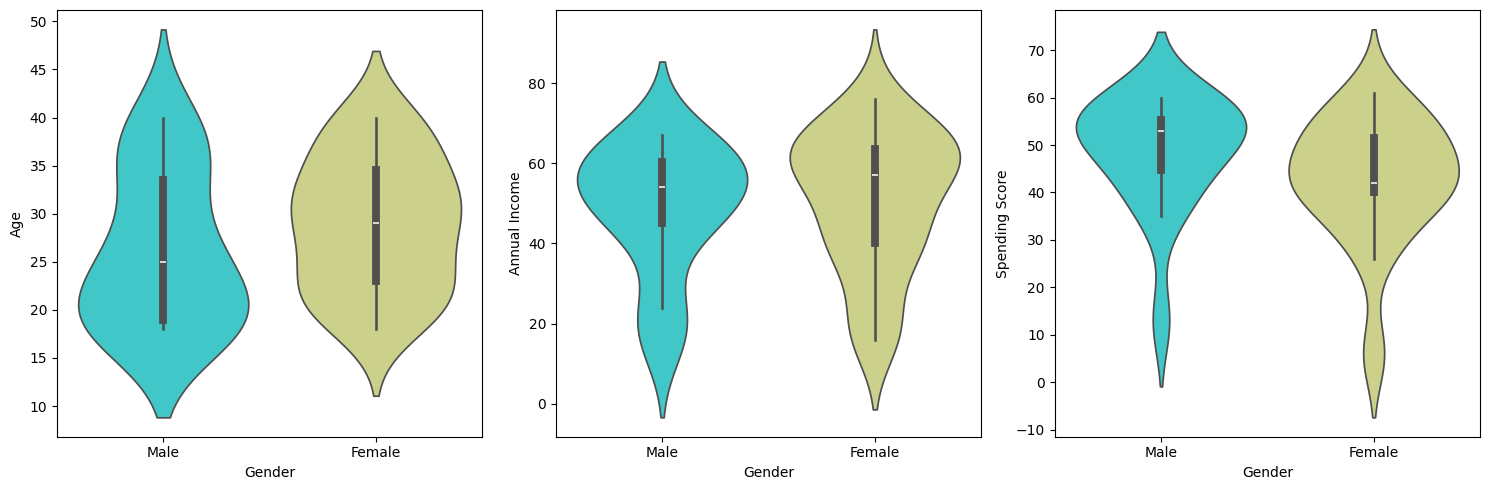

In [ ]:
group_3 = df_ori[df_ori['Category'] == 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(x='Gender', y='Age', data=group_3, hue='Gender', palette='rainbow', ax=axes[0])
sns.violinplot(x='Gender', y='Annual Income', data=group_3, hue='Gender', palette='rainbow', ax=axes[1])
sns.violinplot(x='Gender', y='Spending Score', data=group_3, hue='Gender', palette='rainbow', ax=axes[2])

plt.tight_layout() # Opsional: Untuk mencegah tumpang tindih
plt.show()

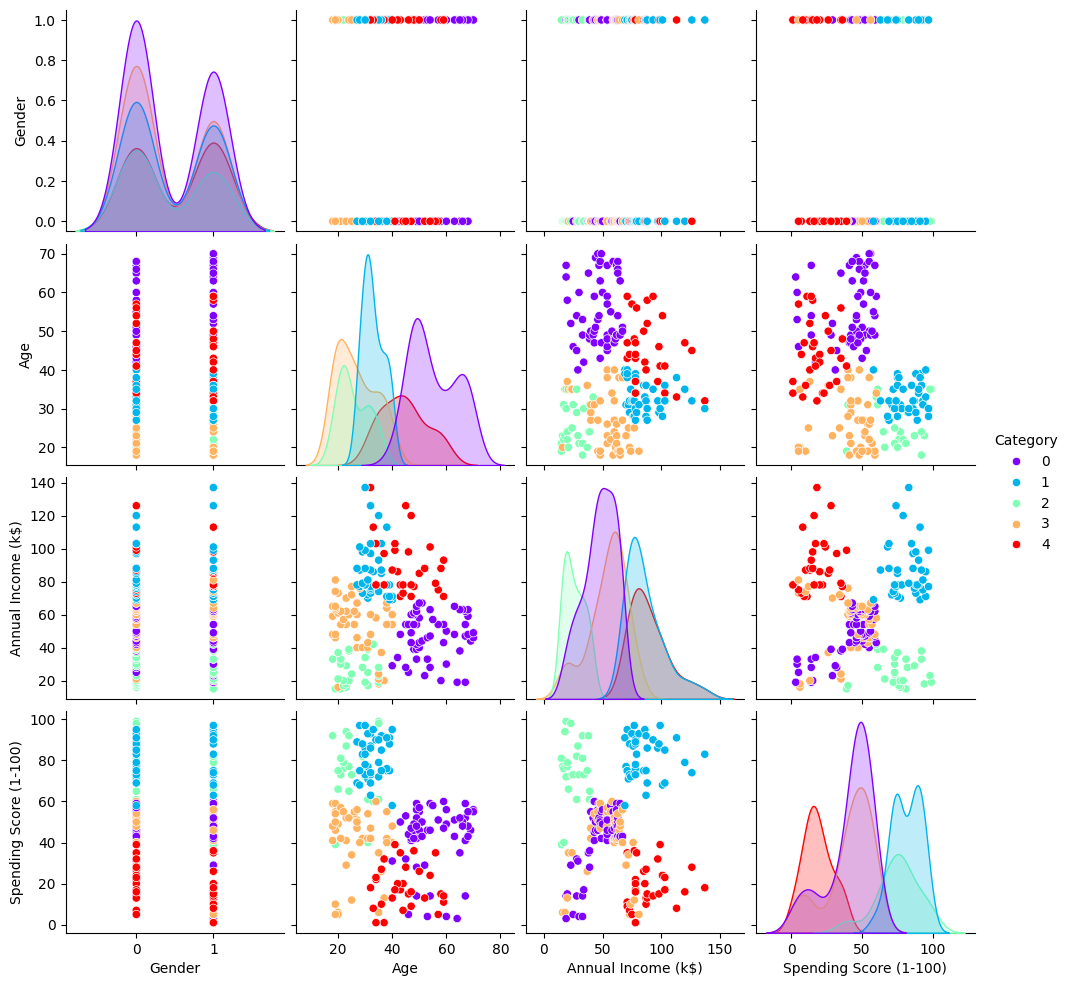

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Menghapus kolom 'Gender' dari DataFrame df
# df.drop('Gender', axis=1, inplace=True)

# Melakukan clustering dengan KMeans
km = KMeans(n_clusters=5, random_state=42)
km.fit(df)

# Membaca kembali data asli ke dalam variabel lain
mall_ori = pd.read_csv('mall_customer.csv')

# Menghapus kolom 'Customer ID' karena tidak diperlukan
mall_ori.drop('CustomerID', axis=1, inplace=True)

# Mengonversi kolom 'Gender' ke bentuk numerik
labeler = LabelEncoder()
mall_ori['Gender'] = labeler.fit_transform(mall_ori['Gender'])

# Menambahkan kolom 'Category' untuk menyimpan hasil clustering
mall_ori['Category'] = km.labels_

# Visualisasi hasil clustering dengan pairplot
sns.pairplot(data=mall_ori, hue='Category', palette='rainbow')
